# 1. Import libraries and load the dataset

In [22]:
!pip install attention

In [23]:
import numpy as np
from numpy import newaxis
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, Activation
from keras import optimizers

from attention import Attention
from keras.models import Sequential
from keras import optimizers

In [24]:
df = pd.read_csv("./BTC.csv")
df1 = df.reset_index()['Price']
df1.head()

0    28456.1
1    28473.7
2    28029.5
3    28350.4
4    27262.2
Name: Price, dtype: float64

Data preprocessing

In [25]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# 2. Split the data into training, test and validate  sets

In [26]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1363, 1)
Test shape: (389, 1)
Validate shape: (196, 1)


In [27]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1168, 1)
Test shape: (389, 1)
Validate shape: (391, 1)


In [28]:
train_size = int(0.7 * len(df1))
test_size = int(0.15 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1363, 1)
Test shape: (292, 1)
Validate shape: (293, 1)


In [29]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [41]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1262, 100)
y_train:  (1262,)
X_val:  (192, 100)
y_val:  (192,)
X_test:  (191, 100)
y_test (191,)


In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

# 3. Perform RNN-Attention Model

## 3.1 Build the RNN Attention Model

In [32]:
model = Sequential([
    SimpleRNN(100, return_sequences=True, input_shape=(time_step, 1)),
    Attention(),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 attention_1 (Attention)     (None, 128)               35600     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,961
Trainable params: 49,961
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
20/20 [==============================] - 3s 56ms/step - loss: 0.0258 - accuracy: 7.9239e-04 - val_loss: 7.8876e-04 - val_accuracy: 0.0052
Epoch 2/300
20/20 [==============================] - 1s 38ms/step - loss: 0.0013 - accuracy: 7.9239e-04 - val_loss: 5.7125e-04 - val_accuracy: 0.0052
Epoch 3/300
20/20 [==============================] - 1s 39ms/step - loss: 7.2321e-04 - accuracy: 7.9239e-04 - val_loss: 1.7616e-04 - val_accuracy: 0.0052
Epoch 4/300
20/20 [==============================] - 1s 39ms/step - loss: 6.5230e-04 - accuracy: 7.9239e-04 - val_loss: 2.0900e-04 - val_accuracy: 0.0052
Epoch 5/300
20/20 [==============================] - 1s 37ms/step - loss: 6.7793e-04 - accuracy: 7.9239e-04 - val_loss: 1.2394e-04 - val_accuracy: 0.0052
Epoch 6/300
20/20 [==============================] - 1s 38ms/step - loss: 7.5804e-04 - accuracy: 7.9239e-04 - val_loss: 9.4992e-05 - val_accuracy: 0.0052
Epoch 7/300
20/20 [==============================] - 1s 38ms/step - loss: 6.9524e-04

Epoch 54/300
20/20 [==============================] - 1s 37ms/step - loss: 3.3100e-04 - accuracy: 7.9239e-04 - val_loss: 3.9905e-04 - val_accuracy: 0.0052
Epoch 55/300
20/20 [==============================] - 1s 36ms/step - loss: 3.2930e-04 - accuracy: 7.9239e-04 - val_loss: 3.2916e-04 - val_accuracy: 0.0052
Epoch 56/300
20/20 [==============================] - 1s 37ms/step - loss: 3.5154e-04 - accuracy: 7.9239e-04 - val_loss: 4.4128e-04 - val_accuracy: 0.0052
Epoch 57/300
20/20 [==============================] - 1s 37ms/step - loss: 3.6057e-04 - accuracy: 7.9239e-04 - val_loss: 3.8464e-04 - val_accuracy: 0.0052
Epoch 58/300
20/20 [==============================] - 1s 36ms/step - loss: 3.2961e-04 - accuracy: 7.9239e-04 - val_loss: 5.4486e-04 - val_accuracy: 0.0052
Epoch 59/300
20/20 [==============================] - 1s 36ms/step - loss: 3.3731e-04 - accuracy: 7.9239e-04 - val_loss: 5.0508e-04 - val_accuracy: 0.0052
Epoch 60/300
20/20 [==============================] - 1s 36ms/step - l

Epoch 107/300
20/20 [==============================] - 1s 41ms/step - loss: 3.4166e-04 - accuracy: 7.9239e-04 - val_loss: 1.0436e-04 - val_accuracy: 0.0052
Epoch 108/300
20/20 [==============================] - 1s 40ms/step - loss: 3.0984e-04 - accuracy: 7.9239e-04 - val_loss: 1.2534e-04 - val_accuracy: 0.0052
Epoch 109/300
20/20 [==============================] - 1s 41ms/step - loss: 3.3576e-04 - accuracy: 7.9239e-04 - val_loss: 2.7618e-04 - val_accuracy: 0.0052
Epoch 110/300
20/20 [==============================] - 1s 46ms/step - loss: 3.5977e-04 - accuracy: 7.9239e-04 - val_loss: 1.7760e-04 - val_accuracy: 0.0052
Epoch 111/300
20/20 [==============================] - 1s 44ms/step - loss: 5.1463e-04 - accuracy: 7.9239e-04 - val_loss: 9.6815e-05 - val_accuracy: 0.0052
Epoch 112/300
20/20 [==============================] - 1s 45ms/step - loss: 3.9393e-04 - accuracy: 7.9239e-04 - val_loss: 5.6808e-05 - val_accuracy: 0.0052
Epoch 113/300
20/20 [==============================] - 1s 43ms/s

20/20 [==============================] - 1s 42ms/step - loss: 3.4367e-04 - accuracy: 7.9239e-04 - val_loss: 6.1162e-05 - val_accuracy: 0.0052
Epoch 160/300
20/20 [==============================] - 1s 40ms/step - loss: 3.6908e-04 - accuracy: 7.9239e-04 - val_loss: 6.0833e-05 - val_accuracy: 0.0052
Epoch 161/300
20/20 [==============================] - 1s 37ms/step - loss: 3.1745e-04 - accuracy: 7.9239e-04 - val_loss: 6.9548e-05 - val_accuracy: 0.0052
Epoch 162/300
20/20 [==============================] - 1s 40ms/step - loss: 3.7498e-04 - accuracy: 7.9239e-04 - val_loss: 8.1101e-05 - val_accuracy: 0.0052
Epoch 163/300
20/20 [==============================] - 1s 37ms/step - loss: 4.8464e-04 - accuracy: 7.9239e-04 - val_loss: 5.5942e-05 - val_accuracy: 0.0052
Epoch 164/300
20/20 [==============================] - 1s 39ms/step - loss: 3.6238e-04 - accuracy: 7.9239e-04 - val_loss: 7.9504e-05 - val_accuracy: 0.0052
Epoch 165/300
20/20 [==============================] - 1s 40ms/step - loss: 3.

20/20 [==============================] - 1s 37ms/step - loss: 3.1960e-04 - accuracy: 7.9239e-04 - val_loss: 2.6859e-04 - val_accuracy: 0.0052
Epoch 212/300
20/20 [==============================] - 1s 37ms/step - loss: 3.2129e-04 - accuracy: 7.9239e-04 - val_loss: 1.6559e-04 - val_accuracy: 0.0052
Epoch 213/300
20/20 [==============================] - 1s 36ms/step - loss: 3.3557e-04 - accuracy: 7.9239e-04 - val_loss: 2.5348e-04 - val_accuracy: 0.0052
Epoch 214/300
20/20 [==============================] - 1s 36ms/step - loss: 3.1623e-04 - accuracy: 7.9239e-04 - val_loss: 2.9917e-04 - val_accuracy: 0.0052
Epoch 215/300
20/20 [==============================] - 1s 37ms/step - loss: 3.2566e-04 - accuracy: 7.9239e-04 - val_loss: 3.0011e-04 - val_accuracy: 0.0052
Epoch 216/300
20/20 [==============================] - 1s 37ms/step - loss: 3.7529e-04 - accuracy: 7.9239e-04 - val_loss: 1.5588e-04 - val_accuracy: 0.0052
Epoch 217/300
20/20 [==============================] - 1s 37ms/step - loss: 3.

20/20 [==============================] - 1s 38ms/step - loss: 4.0999e-04 - accuracy: 7.9239e-04 - val_loss: 6.9133e-04 - val_accuracy: 0.0052
Epoch 264/300
20/20 [==============================] - 1s 38ms/step - loss: 3.1648e-04 - accuracy: 7.9239e-04 - val_loss: 7.5418e-04 - val_accuracy: 0.0052
Epoch 265/300
20/20 [==============================] - 1s 41ms/step - loss: 3.1103e-04 - accuracy: 7.9239e-04 - val_loss: 6.2131e-04 - val_accuracy: 0.0052
Epoch 266/300
20/20 [==============================] - 1s 39ms/step - loss: 2.9394e-04 - accuracy: 7.9239e-04 - val_loss: 8.0981e-04 - val_accuracy: 0.0052
Epoch 267/300
20/20 [==============================] - 1s 38ms/step - loss: 3.6152e-04 - accuracy: 7.9239e-04 - val_loss: 8.4614e-04 - val_accuracy: 0.0052
Epoch 268/300
20/20 [==============================] - 1s 37ms/step - loss: 3.2143e-04 - accuracy: 7.9239e-04 - val_loss: 7.5989e-04 - val_accuracy: 0.0052
Epoch 269/300
20/20 [==============================] - 1s 37ms/step - loss: 3.

In [34]:
def evaluate_rnn_attention_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

## 3.2 Evaluate on Validate data

In [35]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_rnn_attention_model(y_val, X_val)

6/6 [==============================] - 0s 11ms/step


## 3.3 Evaluate on Test data

In [36]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_rnn_attention_model(y_test, X_test)

6/6 [==============================] - 0s 11ms/step


In [37]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

40/40 [==============================] - 0s 11ms/step
(192, 1) (191, 1)


In [38]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=232
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input= x_input.reshape(1,-1)
        print("x_input:",x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.06393081 0.06607858 0.06461822 0.0636602  0.05445169 0.048744
 0.04706279 0.04668021 0.04699747 0.04915147 0.04787773 0.053475
 0.05421685 0.05500535 0.05270672 0.0515994  0.05240656 0.05108617
 0.05273472 0.04880465 0.04930388 0.04641737 0.04128823 0.04550912
 0.04437691 0.04709079 0.04550445 0.04570197 0.04396633 0.05442214
 0.05500379 0.05480161 0.05429461 0.05025879 0.05096642 0.04948118
 0.05316396 0.04795705 0.05178136 0.05687785 0.05515465 0.06667424
 0.06832744 0.06950475 0.06893243 0.06847364 0.06649538 0.06999465
 0.06870848 0.06690752 0.06646895 0.06487484 0.06592617 0.06050775
 0.06435539 0.06427141 0.06608169 0.06787332 0.0666198  0.07429797
 0.0804769  0.08243182 0.07801652 0.07802585 0.07518445 0.07956087
 0.0816231  0.08468846 0.08499017 0.08135093 0.08055466 0.09015664
 0.09471969 0.09281142 0.09646932 0.09996547 0.10303083 0.1007773
 0.1014165  0.09353927 0.09092182 0.09356882 0.09621271 0.09523758
 0.08883781 0.09422046 0.08778336 0.09979284 0.08902288

4 day output [[0.05011926]]
5 day input [0.048744   0.04706279 0.04668021 0.04699747 0.04915147 0.04787773
 0.053475   0.05421685 0.05500535 0.05270672 0.0515994  0.05240656
 0.05108617 0.05273472 0.04880465 0.04930388 0.04641737 0.04128823
 0.04550912 0.04437691 0.04709079 0.04550445 0.04570197 0.04396633
 0.05442214 0.05500379 0.05480161 0.05429461 0.05025879 0.05096642
 0.04948118 0.05316396 0.04795705 0.05178136 0.05687785 0.05515465
 0.06667424 0.06832744 0.06950475 0.06893243 0.06847364 0.06649538
 0.06999465 0.06870848 0.06690752 0.06646895 0.06487484 0.06592617
 0.06050775 0.06435539 0.06427141 0.06608169 0.06787332 0.0666198
 0.07429797 0.0804769  0.08243182 0.07801652 0.07802585 0.07518445
 0.07956087 0.0816231  0.08468846 0.08499017 0.08135093 0.08055466
 0.09015664 0.09471969 0.09281142 0.09646932 0.09996547 0.10303083
 0.1007773  0.1014165  0.09353927 0.09092182 0.09356882 0.09621271
 0.09523758 0.08883781 0.09422046 0.08778336 0.09979284 0.08902288
 0.08675069 0.08856098 

8 day output [[-0.0122603]]
9 day input [ 0.04915147  0.04787773  0.053475    0.05421685  0.05500535  0.05270672
  0.0515994   0.05240656  0.05108617  0.05273472  0.04880465  0.04930388
  0.04641737  0.04128823  0.04550912  0.04437691  0.04709079  0.04550445
  0.04570197  0.04396633  0.05442214  0.05500379  0.05480161  0.05429461
  0.05025879  0.05096642  0.04948118  0.05316396  0.04795705  0.05178136
  0.05687785  0.05515465  0.06667424  0.06832744  0.06950475  0.06893243
  0.06847364  0.06649538  0.06999465  0.06870848  0.06690752  0.06646895
  0.06487484  0.06592617  0.06050775  0.06435539  0.06427141  0.06608169
  0.06787332  0.0666198   0.07429797  0.0804769   0.08243182  0.07801652
  0.07802585  0.07518445  0.07956087  0.0816231   0.08468846  0.08499017
  0.08135093  0.08055466  0.09015664  0.09471969  0.09281142  0.09646932
  0.09996547  0.10303083  0.1007773   0.1014165   0.09353927  0.09092182
  0.09356882  0.09621271  0.09523758  0.08883781  0.09422046  0.08778336
  0.0997928

12 day output [[0.03328456]]
13 day input [ 0.05500535  0.05270672  0.0515994   0.05240656  0.05108617  0.05273472
  0.04880465  0.04930388  0.04641737  0.04128823  0.04550912  0.04437691
  0.04709079  0.04550445  0.04570197  0.04396633  0.05442214  0.05500379
  0.05480161  0.05429461  0.05025879  0.05096642  0.04948118  0.05316396
  0.04795705  0.05178136  0.05687785  0.05515465  0.06667424  0.06832744
  0.06950475  0.06893243  0.06847364  0.06649538  0.06999465  0.06870848
  0.06690752  0.06646895  0.06487484  0.06592617  0.06050775  0.06435539
  0.06427141  0.06608169  0.06787332  0.0666198   0.07429797  0.0804769
  0.08243182  0.07801652  0.07802585  0.07518445  0.07956087  0.0816231
  0.08468846  0.08499017  0.08135093  0.08055466  0.09015664  0.09471969
  0.09281142  0.09646932  0.09996547  0.10303083  0.1007773   0.1014165
  0.09353927  0.09092182  0.09356882  0.09621271  0.09523758  0.08883781
  0.09422046  0.08778336  0.09979284  0.08902288  0.08675069  0.08856098
  0.08768849

16 day output [[0.00985633]]
17 day input [ 0.05108617  0.05273472  0.04880465  0.04930388  0.04641737  0.04128823
  0.04550912  0.04437691  0.04709079  0.04550445  0.04570197  0.04396633
  0.05442214  0.05500379  0.05480161  0.05429461  0.05025879  0.05096642
  0.04948118  0.05316396  0.04795705  0.05178136  0.05687785  0.05515465
  0.06667424  0.06832744  0.06950475  0.06893243  0.06847364  0.06649538
  0.06999465  0.06870848  0.06690752  0.06646895  0.06487484  0.06592617
  0.06050775  0.06435539  0.06427141  0.06608169  0.06787332  0.0666198
  0.07429797  0.0804769   0.08243182  0.07801652  0.07802585  0.07518445
  0.07956087  0.0816231   0.08468846  0.08499017  0.08135093  0.08055466
  0.09015664  0.09471969  0.09281142  0.09646932  0.09996547  0.10303083
  0.1007773   0.1014165   0.09353927  0.09092182  0.09356882  0.09621271
  0.09523758  0.08883781  0.09422046  0.08778336  0.09979284  0.08902288
  0.08675069  0.08856098  0.08768849  0.07872726  0.07697918  0.07278318
  0.075293

20 day output [[0.01255353]]
21 day input [ 0.04641737  0.04128823  0.04550912  0.04437691  0.04709079  0.04550445
  0.04570197  0.04396633  0.05442214  0.05500379  0.05480161  0.05429461
  0.05025879  0.05096642  0.04948118  0.05316396  0.04795705  0.05178136
  0.05687785  0.05515465  0.06667424  0.06832744  0.06950475  0.06893243
  0.06847364  0.06649538  0.06999465  0.06870848  0.06690752  0.06646895
  0.06487484  0.06592617  0.06050775  0.06435539  0.06427141  0.06608169
  0.06787332  0.0666198   0.07429797  0.0804769   0.08243182  0.07801652
  0.07802585  0.07518445  0.07956087  0.0816231   0.08468846  0.08499017
  0.08135093  0.08055466  0.09015664  0.09471969  0.09281142  0.09646932
  0.09996547  0.10303083  0.1007773   0.1014165   0.09353927  0.09092182
  0.09356882  0.09621271  0.09523758  0.08883781  0.09422046  0.08778336
  0.09979284  0.08902288  0.08675069  0.08856098  0.08768849  0.07872726
  0.07697918  0.07278318  0.07529332  0.07985947  0.07427309  0.07245347
  0.07306

24 day output [[0.04462597]]
25 day input [ 0.04709079  0.04550445  0.04570197  0.04396633  0.05442214  0.05500379
  0.05480161  0.05429461  0.05025879  0.05096642  0.04948118  0.05316396
  0.04795705  0.05178136  0.05687785  0.05515465  0.06667424  0.06832744
  0.06950475  0.06893243  0.06847364  0.06649538  0.06999465  0.06870848
  0.06690752  0.06646895  0.06487484  0.06592617  0.06050775  0.06435539
  0.06427141  0.06608169  0.06787332  0.0666198   0.07429797  0.0804769
  0.08243182  0.07801652  0.07802585  0.07518445  0.07956087  0.0816231
  0.08468846  0.08499017  0.08135093  0.08055466  0.09015664  0.09471969
  0.09281142  0.09646932  0.09996547  0.10303083  0.1007773   0.1014165
  0.09353927  0.09092182  0.09356882  0.09621271  0.09523758  0.08883781
  0.09422046  0.08778336  0.09979284  0.08902288  0.08675069  0.08856098
  0.08768849  0.07872726  0.07697918  0.07278318  0.07529332  0.07985947
  0.07427309  0.07245347  0.07306312  0.05806293  0.05639417  0.05526041
  0.05912671

28 day output [[0.01372942]]
29 day input [ 0.05442214  0.05500379  0.05480161  0.05429461  0.05025879  0.05096642
  0.04948118  0.05316396  0.04795705  0.05178136  0.05687785  0.05515465
  0.06667424  0.06832744  0.06950475  0.06893243  0.06847364  0.06649538
  0.06999465  0.06870848  0.06690752  0.06646895  0.06487484  0.06592617
  0.06050775  0.06435539  0.06427141  0.06608169  0.06787332  0.0666198
  0.07429797  0.0804769   0.08243182  0.07801652  0.07802585  0.07518445
  0.07956087  0.0816231   0.08468846  0.08499017  0.08135093  0.08055466
  0.09015664  0.09471969  0.09281142  0.09646932  0.09996547  0.10303083
  0.1007773   0.1014165   0.09353927  0.09092182  0.09356882  0.09621271
  0.09523758  0.08883781  0.09422046  0.08778336  0.09979284  0.08902288
  0.08675069  0.08856098  0.08768849  0.07872726  0.07697918  0.07278318
  0.07529332  0.07985947  0.07427309  0.07245347  0.07306312  0.05806293
  0.05639417  0.05526041  0.05912671  0.05718578  0.05280937  0.05526196
  0.055680

In [39]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE          MAPE      RMSE
Validate  0.000168  0.008987  7.598913e-02  0.012943
Test      0.000772  0.023554  9.400745e+11  0.027783


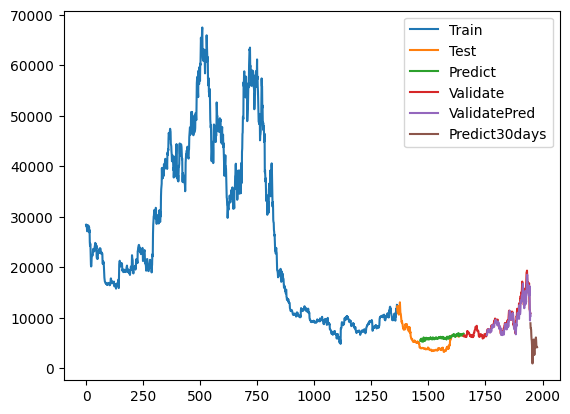

In [40]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()